In [391]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.metrics import mean_squared_error
from math import sqrt

In [392]:
tcr = pd.read_csv('ToyotaCorolla.csv')

In [393]:
tcr2 = tcr.copy()

In [394]:
tcr.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


In [395]:
tcr.shape

(1436, 39)

In [396]:
tcr.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')

In [397]:
tcr.dtypes

Id                    int64
Model                object
Price                 int64
Age_08_04             int64
Mfg_Month             int64
Mfg_Year              int64
KM                    int64
Fuel_Type            object
HP                    int64
Met_Color             int64
Color                object
Automatic             int64
CC                    int64
Doors                 int64
Cylinders             int64
Gears                 int64
Quarterly_Tax         int64
Weight                int64
Mfr_Guarantee         int64
BOVAG_Guarantee       int64
Guarantee_Period      int64
ABS                   int64
Airbag_1              int64
Airbag_2              int64
Airco                 int64
Automatic_airco       int64
Boardcomputer         int64
CD_Player             int64
Central_Lock          int64
Powered_Windows       int64
Power_Steering        int64
Radio                 int64
Mistlamps             int64
Sport_Model           int64
Backseat_Divider      int64
Metallic_Rim        

In [400]:
tcr['Fuel_Type'] = tcr['Fuel_Type'].astype('category')

In [401]:
predictors = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax', 'Mfr_Guarantee', 
              'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows', 'Sport_Model', 'Tow_Bar']
outcome = ['Price']

In [402]:
X = pd.get_dummies(tcr[predictors])
y = tcr[outcome]

In [403]:
X.columns

Index(['Age_08_04', 'KM', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax',
       'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco',
       'CD_Player', 'Powered_Windows', 'Sport_Model', 'Tow_Bar',
       'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')

In [404]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.4, random_state = 1 )

In [405]:
X.dtypes

Age_08_04           int64
KM                  int64
HP                  int64
Automatic           int64
Doors               int64
Quarterly_Tax       int64
Mfr_Guarantee       int64
Guarantee_Period    int64
Airco               int64
Automatic_airco     int64
CD_Player           int64
Powered_Windows     int64
Sport_Model         int64
Tow_Bar             int64
Fuel_Type_CNG       uint8
Fuel_Type_Diesel    uint8
Fuel_Type_Petrol    uint8
dtype: object

In [406]:
fulltree = DecisionTreeRegressor()
clf = fulltree.fit(X_train, y_train)
export_graphviz(clf, feature_names = X_train.columns)

'digraph Tree {\nnode [shape=box] ;\n0 [label="Age_08_04 <= 32.5\\nmse = 13737278.09\\nsamples = 861\\nvalue = 10774.153"] ;\n1 [label="HP <= 113.0\\nmse = 10885041.928\\nsamples = 118\\nvalue = 18325.483"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Age_08_04 <= 21.0\\nmse = 6113003.605\\nsamples = 106\\nvalue = 17645.349"] ;\n1 -> 2 ;\n3 [label="Automatic_airco <= 0.5\\nmse = 4217802.875\\nsamples = 55\\nvalue = 18960.327"] ;\n2 -> 3 ;\n4 [label="KM <= 20052.5\\nmse = 3123675.311\\nsamples = 35\\nvalue = 18173.657"] ;\n3 -> 4 ;\n5 [label="Airco <= 0.5\\nmse = 2347048.231\\nsamples = 22\\nvalue = 18937.636"] ;\n4 -> 5 ;\n6 [label="mse = 0.0\\nsamples = 1\\nvalue = 23750.0"] ;\n5 -> 6 ;\n7 [label="Doors <= 4.5\\nmse = 1303495.964\\nsamples = 21\\nvalue = 18708.476"] ;\n5 -> 7 ;\n8 [label="Age_08_04 <= 14.5\\nmse = 501217.837\\nsamples = 7\\nvalue = 17901.857"] ;\n7 -> 8 ;\n9 [label="KM <= 5750.5\\nmse = 149004.0\\nsamples = 5\\nvalue = 18299.0"] ;\n8 -> 

The four most important car specifications for predicting the car's price are: Age_08_04, Automatic_airco, Doors and Sport_model.

In [407]:
pred_train = fulltree.predict(X_train)
pred_valid = fulltree.predict(X_valid) 


In [408]:
print("Train Root Mean Squared Error: %.2f"% sqrt(mean_squared_error(y_train, pred_train)))

Train Root Mean Squared Error: 0.00


In [409]:
print("Validation Root Mean Squared Error: %.2f"% sqrt(mean_squared_error(y_valid, pred_valid)))

Validation Root Mean Squared Error: 1469.00


The training set has zero error while the validation set a root mean squared error of about 1,452.There was overfitting on the training set but it was reduced on the validation set.

We can achieve better validation predictive performance at the expense of training performance through using only the important predictors and through hyper parameter optimization.

In [410]:
param_grid = {
    'max_depth': [3,4,5,6,7,8,9,10,11,12],
    'min_impurity_decrease':[0, 0.001, 0.0002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008],
    'min_samples_split': [14, 15, 16, 18, 20],
} 

gridsearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs = -1)
gridsearch.fit(X_train, y_train)

smallTreeReg = gridsearch.best_estimator_
print(smallTreeReg)

DecisionTreeRegressor(max_depth=6, min_impurity_decrease=0,
                      min_samples_split=20)


In [411]:
pred_train_st = smallTreeReg.predict(X_train)
pred_valid_st = smallTreeReg.predict(X_valid) 


In [412]:
print("Train Root Mean Squared Error: %.2f"% sqrt(mean_squared_error(y_train, pred_train_st)))
print("Validation Root Mean Squared Error: %.2f"% sqrt(mean_squared_error(y_valid, pred_valid_st)))

Train Root Mean Squared Error: 1082.70
Validation Root Mean Squared Error: 1251.39


The smaller tree has a better performance on the validation set. The error reduced significantly by 12.96%

In [413]:
tcr2.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


In [414]:
#research this variable was binned
tcr2['Binned_Price'] = pd.cut(tcr2.Price, bins = 20, labels=False)

In [415]:
tcr2.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar', 'Binned_Price'],
      dtype='object')

In [416]:
tcr2.drop(['Price'], axis = 1, inplace = True)

In [417]:
predictors = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'Doors', 
              'Quarterly_Tax', 'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco', 
              'CD_Player', 'Powered_Windows', 'Sport_Model', 'Tow_Bar']
outcome = ['Binned_Price']

In [418]:
X = pd.get_dummies(tcr2[predictors])
y = tcr2[outcome]

In [419]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.4, random_state = 1 )

[Text(1824.1159949542064, 3714.6, 'Age_08_04 <= 56.5\ngini = 0.834\nsamples = 861\nvalue = [4, 62, 179, 251, 109, 83, 58, 14, 32, 13, 23, 13\n10, 5, 3, 1, 1]'),
 Text(654.8644843962009, 3533.3999999999996, 'Age_08_04 <= 32.5\ngini = 0.871\nsamples = 362\nvalue = [2, 3, 5, 42, 60, 78, 57, 14, 32, 13, 23, 13\n10, 5, 3, 1, 1]'),
 Text(149.7211668928087, 3352.2, 'Powered_Windows <= 0.5\ngini = 0.845\nsamples = 118\nvalue = [0, 0, 0, 0, 0, 0, 11, 7, 32, 13, 22, 13, 10\n5, 3, 1, 1]'),
 Text(21.199457259158752, 3171.0, 'Age_08_04 <= 24.5\ngini = 0.48\nsamples = 10\nvalue = [0, 0, 0, 0, 0, 0, 6, 4, 0, 0, 0, 0, 0, 0\n0, 0, 0]'),
 Text(10.599728629579376, 2989.7999999999997, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0]'),
 Text(31.79918588873813, 2989.7999999999997, 'Quarterly_Tax <= 52.0\ngini = 0.32\nsamples = 5\nvalue = [0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0\n0, 0, 0]'),
 Text(21.199457259158752, 2808.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0

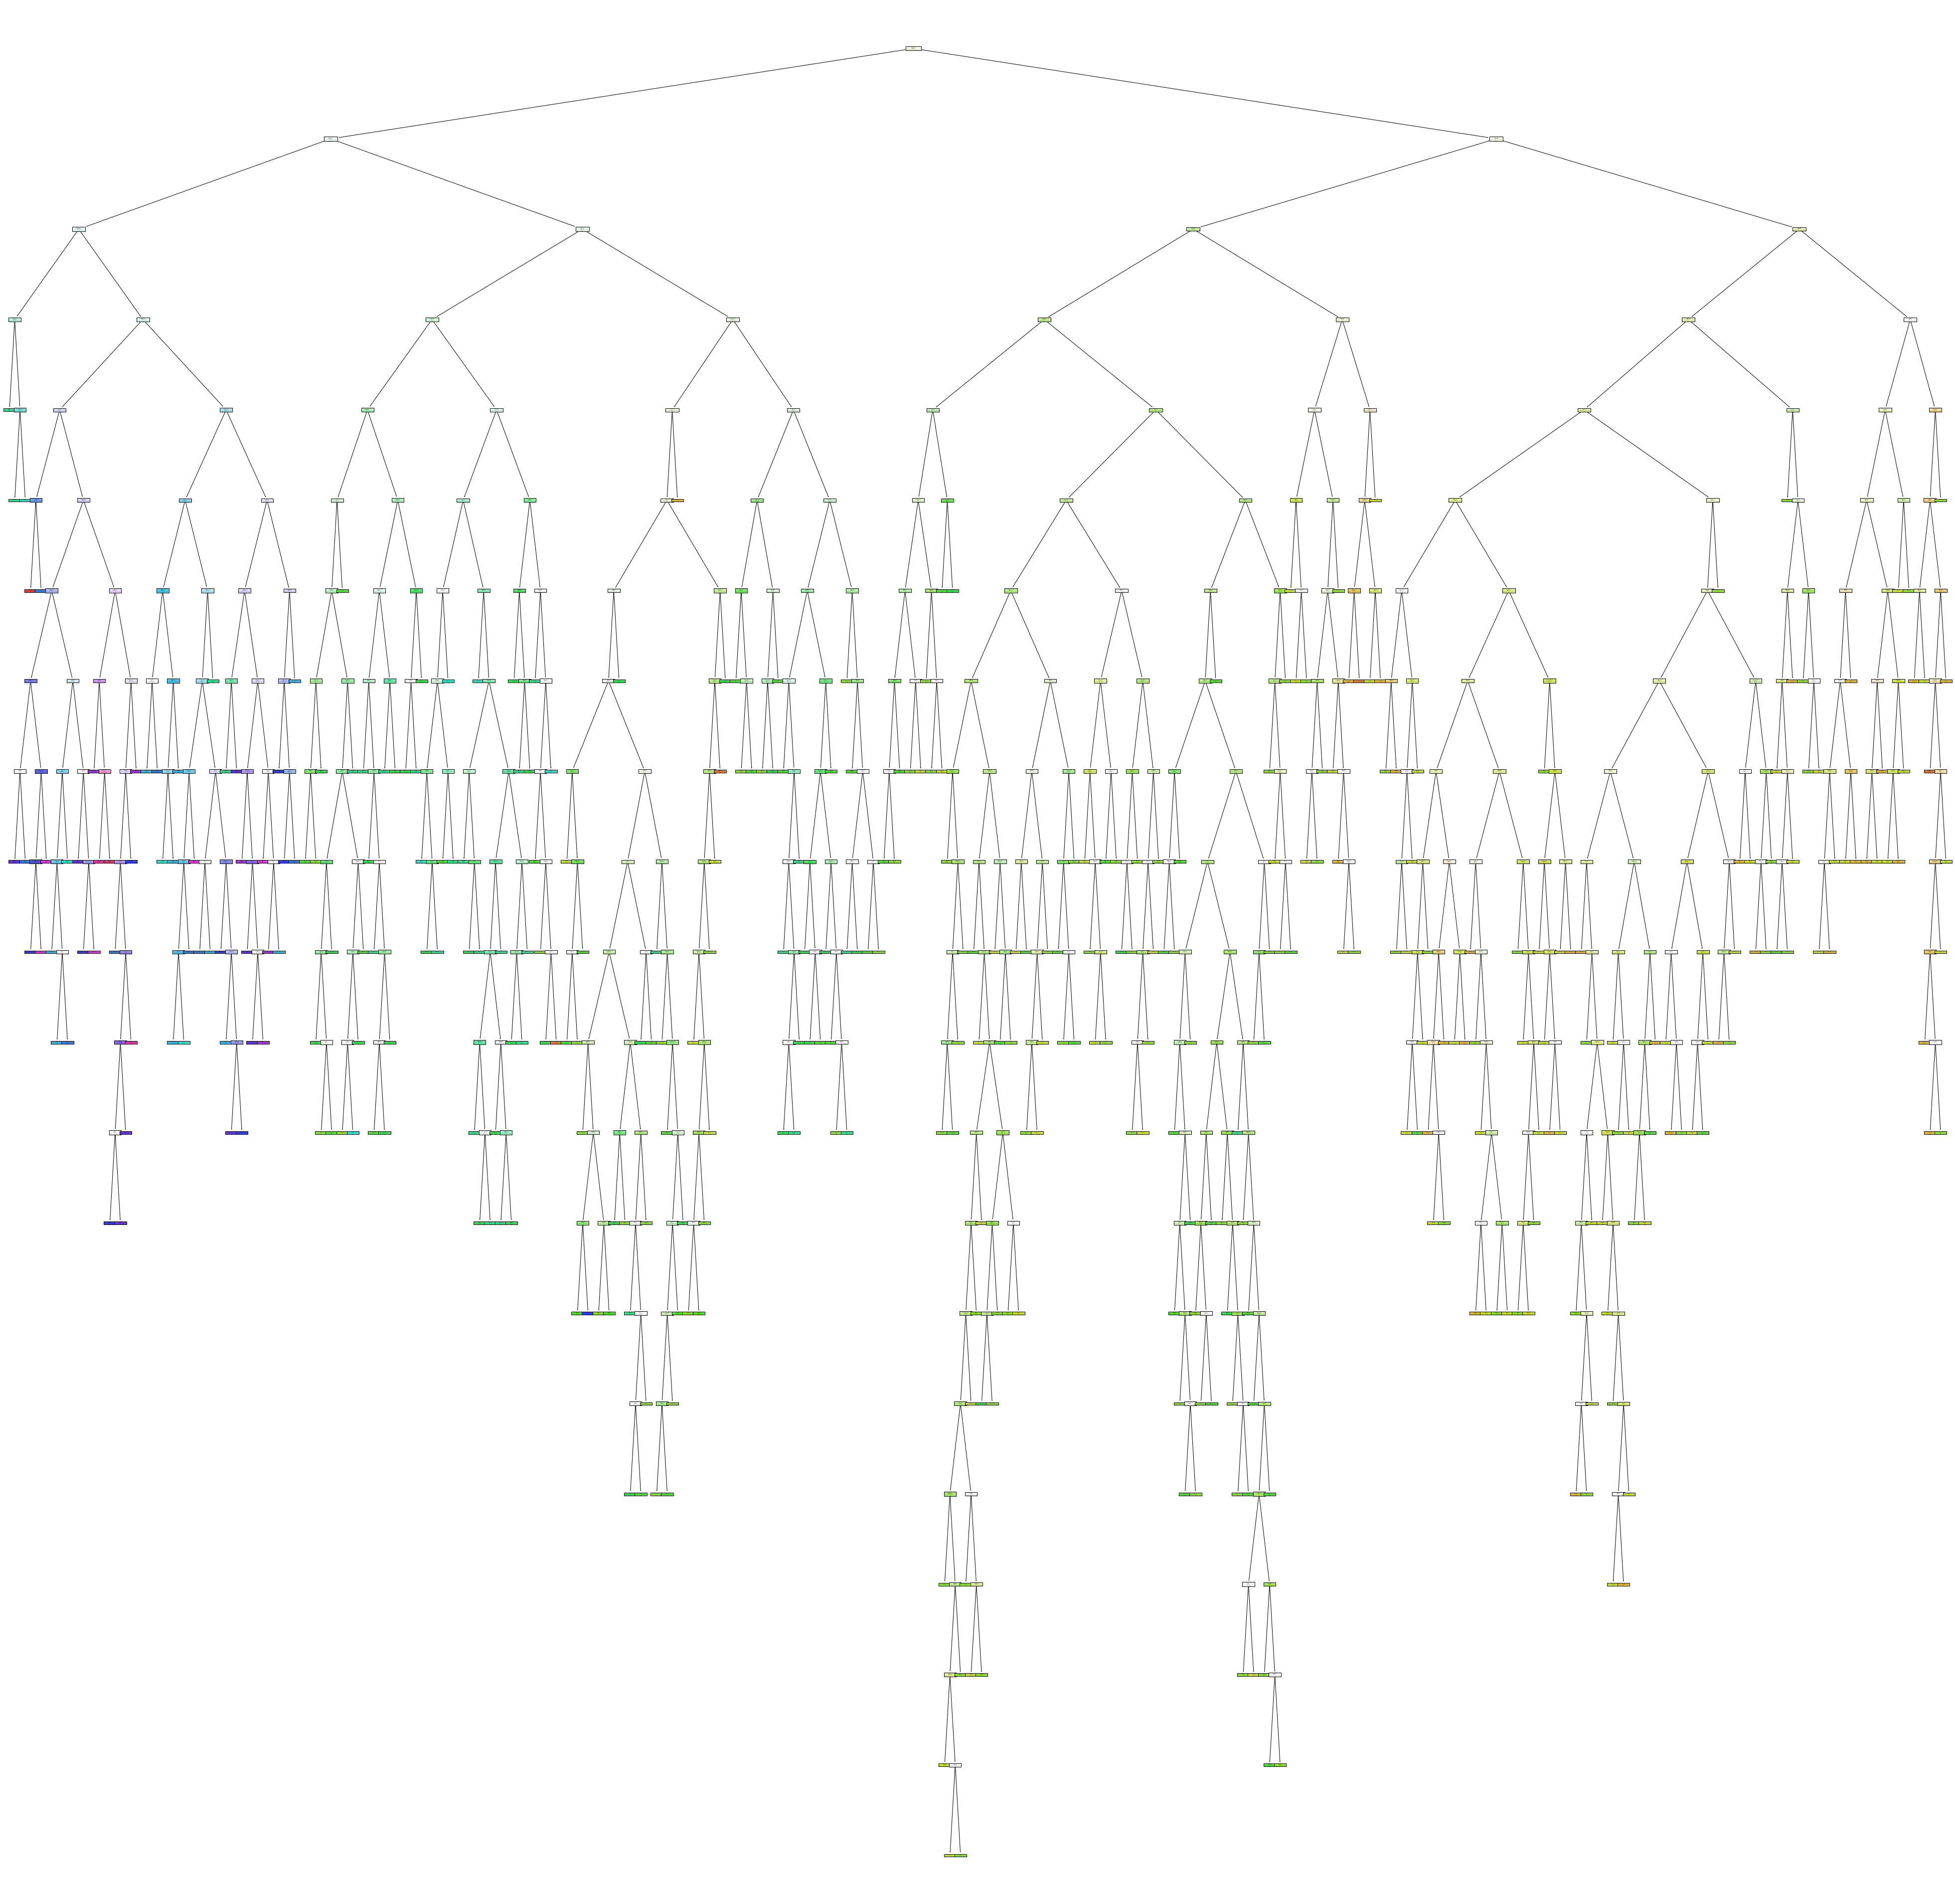

In [420]:
FullClassTree = tree.DecisionTreeClassifier()
full_clf = FullClassTree.fit(train_X, train_y)
plt.figure(figsize = (70,70))
tree.plot_tree(full_clf, feature_names = train_X.columns, filled = True)

In [421]:
param_grid = {
    'max_depth': [3,4,5,6,7,8,9,10,11,12],
    'min_impurity_decrease':[0, 0.001, 0.0002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008],
    'min_samples_split': [14, 15, 16, 18, 20],
} 

gridsearch = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=5, n_jobs = -1)
gridsearch.fit(train_X, train_y)

smallTreeClass = gridsearch.best_estimator_
print(smallTreeClass)

C:\Users\GETHSEMAN\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0,
                       min_samples_split=16)


[Text(2028.1153846153845, 3986.4, 'Age_08_04 <= 56.5\ngini = 0.834\nsamples = 861\nvalue = [4, 62, 179, 251, 109, 83, 58, 14, 32, 13, 23, 13\n10, 5, 3, 1, 1]'),
 Text(815.5384615384614, 3261.6000000000004, 'Age_08_04 <= 32.5\ngini = 0.871\nsamples = 362\nvalue = [2, 3, 5, 42, 60, 78, 57, 14, 32, 13, 23, 13\n10, 5, 3, 1, 1]'),
 Text(257.53846153846155, 2536.8, 'Powered_Windows <= 0.5\ngini = 0.845\nsamples = 118\nvalue = [0, 0, 0, 0, 0, 0, 11, 7, 32, 13, 22, 13, 10\n5, 3, 1, 1]'),
 Text(171.69230769230768, 1812.0, 'gini = 0.48\nsamples = 10\nvalue = [0, 0, 0, 0, 0, 0, 6, 4, 0, 0, 0, 0, 0, 0\n0, 0, 0]'),
 Text(343.38461538461536, 1812.0, 'KM <= 24244.5\ngini = 0.827\nsamples = 108\nvalue = [0, 0, 0, 0, 0, 0, 5, 3, 32, 13, 22, 13, 10\n5, 3, 1, 1]'),
 Text(171.69230769230768, 1087.1999999999998, 'KM <= 8.0\ngini = 0.83\nsamples = 49\nvalue = [0, 0, 0, 0, 0, 0, 0, 1, 4, 7, 15, 7, 7, 3\n3, 1, 1]'),
 Text(85.84615384615384, 362.39999999999964, 'gini = 0.32\nsamples = 5\nvalue = [0, 0, 0, 0, 0

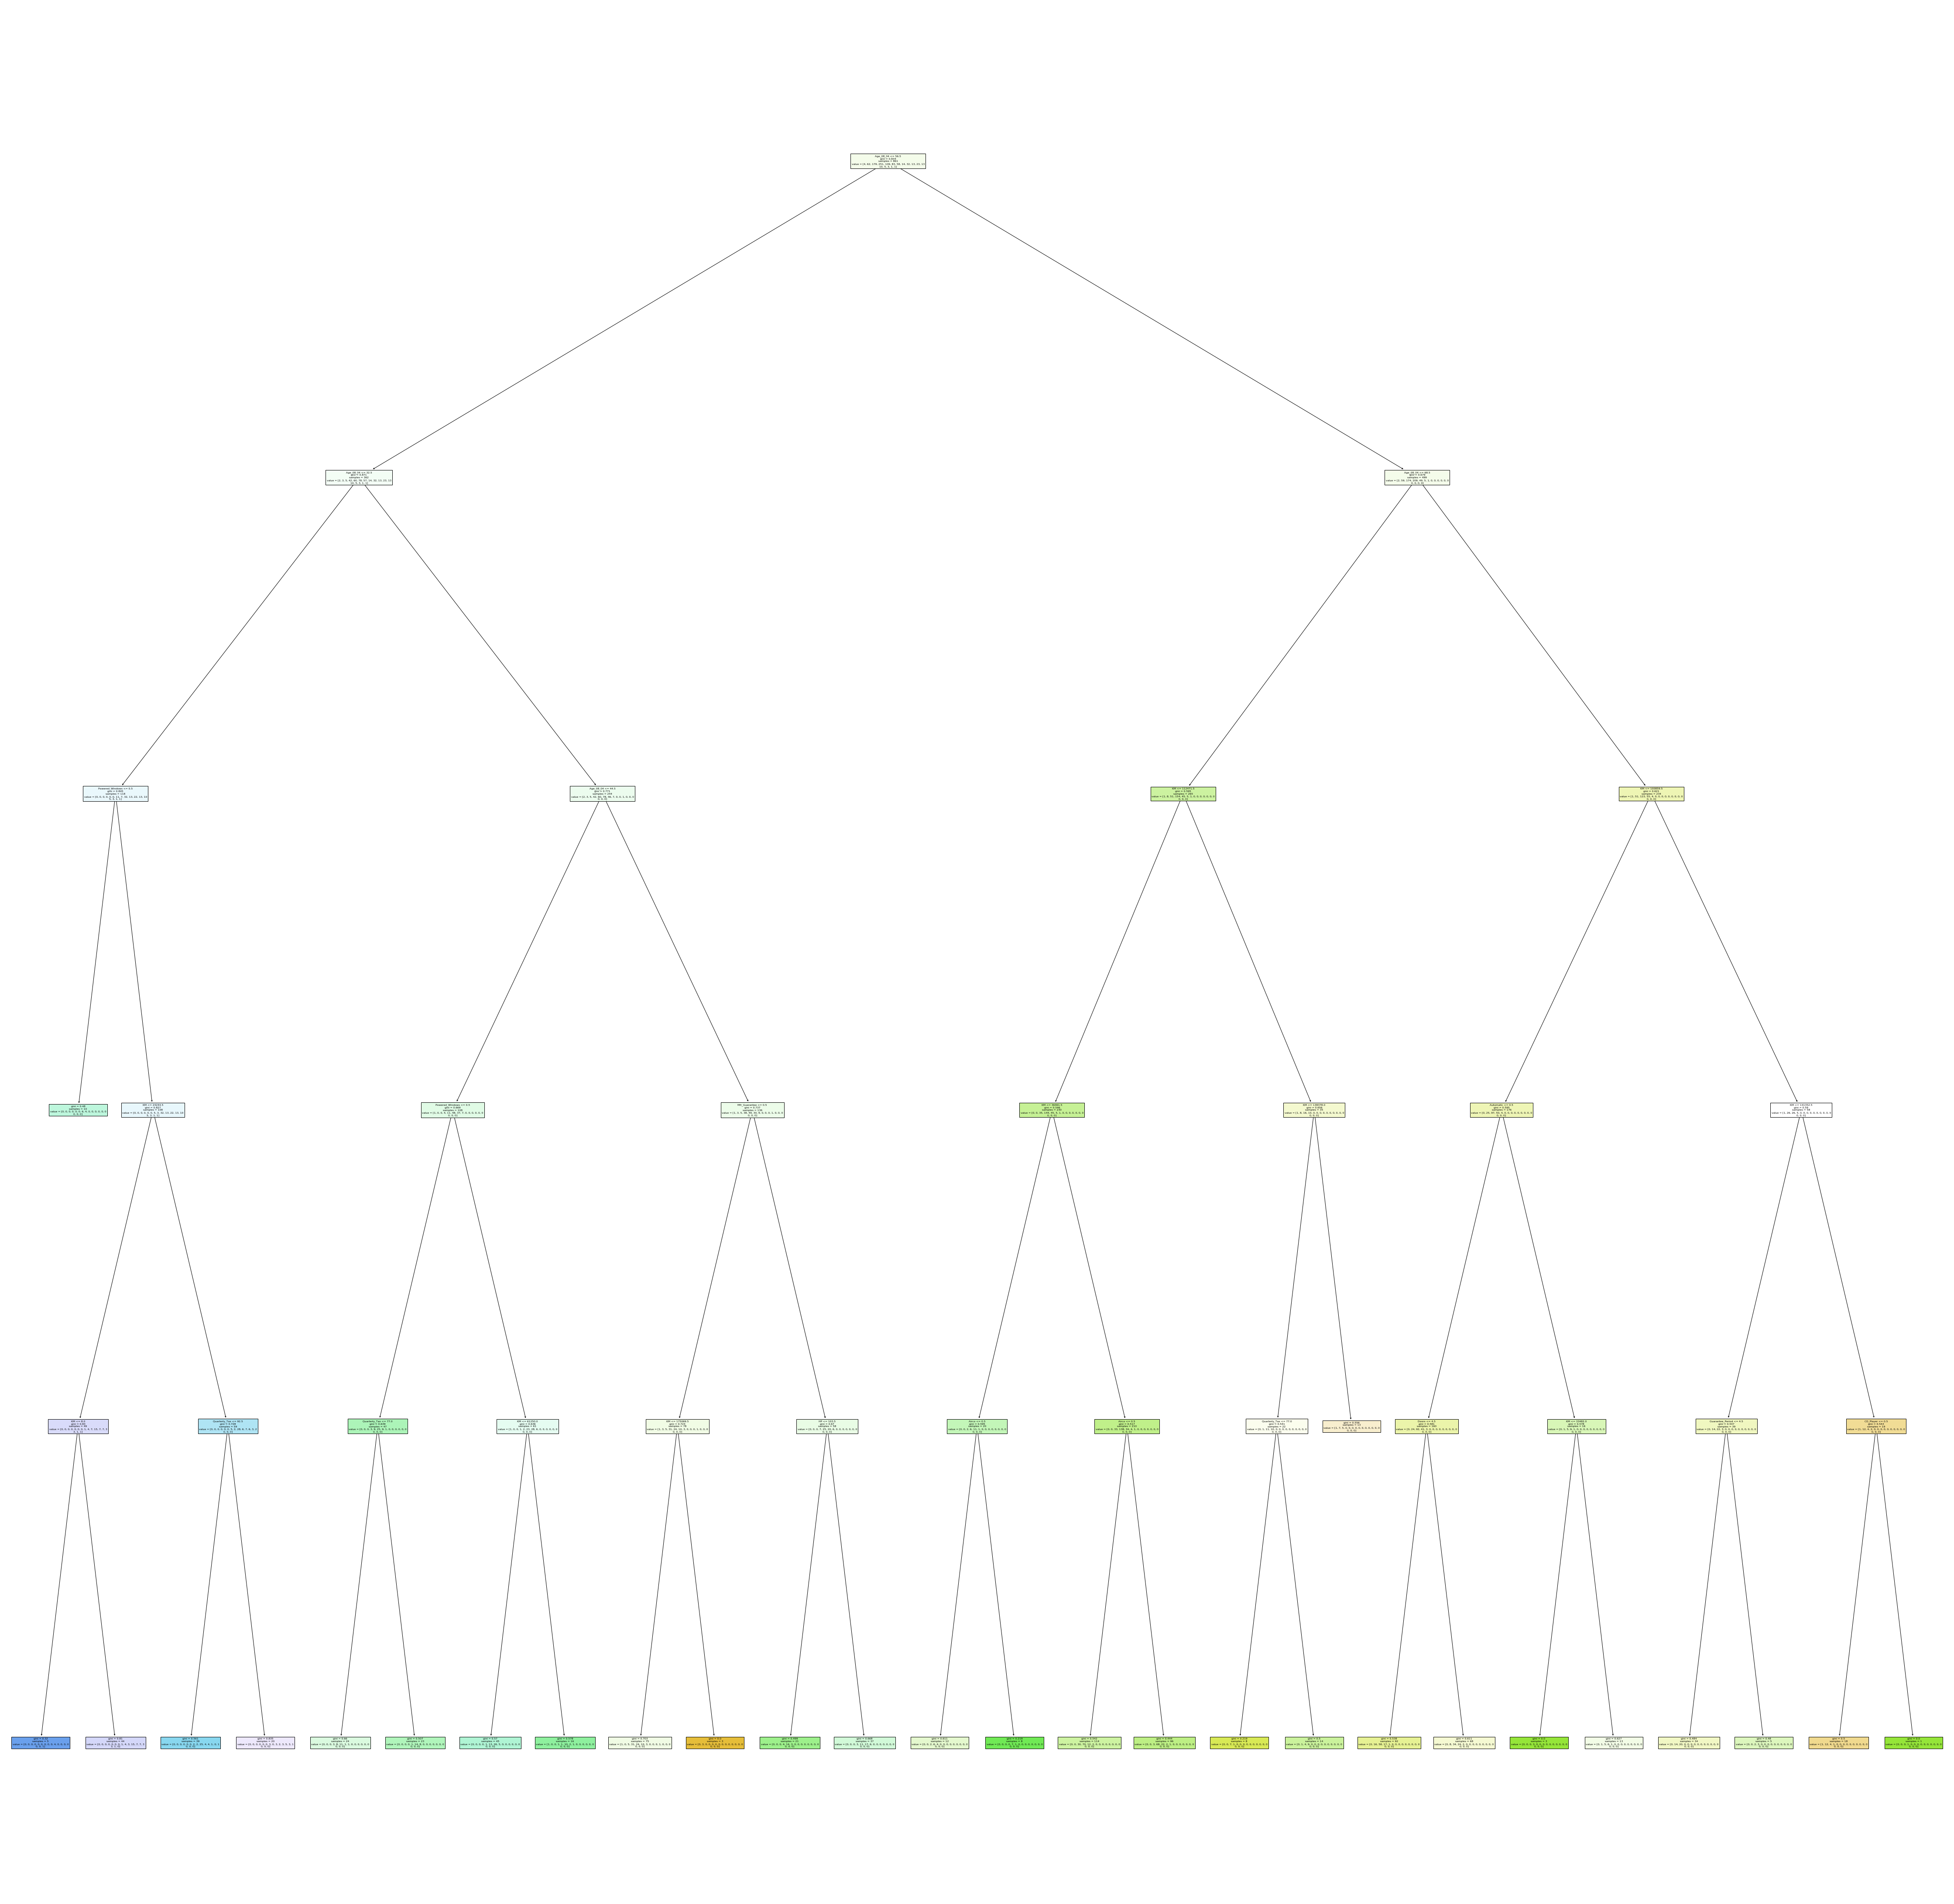

In [422]:
plt.figure(figsize = (80,80))
tree.plot_tree(smallTreeClass, feature_names = train_X.columns, filled = True)

Compare the smaller tree generated by the CT with the smaller tree generated by RT. Are they different? (Look at structure, the top predictors, size of tree, etc.) Why? 

In [423]:
train_X.columns

Index(['Age_08_04', 'KM', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax',
       'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco',
       'CD_Player', 'Powered_Windows', 'Sport_Model', 'Tow_Bar',
       'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')

In [425]:
test_data = pd.DataFrame({'Age_08_04': [77], 'KM' : [117000], 'Fuel_Type_CNG': [0], 'Fuel_Type_Diesel': [0], 'Fuel_Type_Petrol':[1], 'HP': [110], 'Automatic':[0], 'Doors':[5],
                         'Quartely_Tax': [100], 'Mfr_Guarantee':[0], 'Garantee_Period': [3], 'Airco': [1], 'Automatic_airco': [0], 'CD_Player': [0], 
                          'Powered_Windows':[0], 'Sport_Model':[0], 'Tow_Bar': [1]})

In [426]:
test_data.head()

,Age_08_04,KM,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,HP,Automatic,Doors,Quartely_Tax,Mfr_Guarantee,Garantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar
0,77,117000,0,0,1,110,0,5,100,0,3,1,0,0,0,0,1


In [430]:
small_RT_pred = smallTreeReg.predict(test_data)
small_CT_pred = smallTreeClass.predict(test_data)
print(small_RT_pred)
print(small_CT_pred)

[8207.1429]
[3]


iii. Compare the predictions in terms of the predictors that were used, the magnitude of the difference between the two predictions, and the advantages and disadvantages of the two methods.

Check both small trees for the predictors that were used.

small_RT_pred will give a range of values for price while small_CT_pred Price will give the exact value of price. 